In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as pta
import matplotlib.pyplot as plt

# Step 1 :Import Data from yahoo Finance

In [31]:
df = yf.download(tickers="ETH-USD" , interval="5m" , period="5d")
df.drop(["Volume", "Adj Close"] , axis=1 , inplace=True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Datetime,,,,
2022-11-08 00:00:00+00:00,1568.197021,1569.432617,1568.197021,1569.432617
2022-11-08 00:05:00+00:00,1570.465820,1572.784180,1570.465820,1572.784180
2022-11-08 00:10:00+00:00,1573.518311,1573.518311,1571.831787,1572.164185
2022-11-08 00:15:00+00:00,1572.285767,1572.618408,1572.039185,1572.039185
2022-11-08 00:20:00+00:00,1571.574097,1571.574097,1570.249878,1570.676392
...,...,...,...,...
2022-11-12 14:05:00+00:00,1260.818726,1261.079102,1260.714355,1260.965210
2022-11-12 14:10:00+00:00,1260.936279,1260.936279,1260.353271,1260.513184
2022-11-12 14:15:00+00:00,1260.177490,1261.778809,1260.026733,1261.778809


### strategy 1 Tripple SuperTrend + Stoch RSI + EMA 200

In [32]:
#Let's Add them Up
## Trpple Super Trend
df[["ST1","ST1_sig"]] = pta.supertrend(df.High , df.Low , df.Close , length=10 , multiplier=1)[["SUPERT_10_1.0","SUPERTd_10_1.0"]]
df[["ST2" , "ST2_sig"]] = pta.supertrend(df.High , df.Low , df.Close , length=11 , multiplier=2)[["SUPERT_11_2.0","SUPERTd_11_2.0"]]
df[["ST3" , "ST3_sig"]] = pta.supertrend(df.High , df.Low , df.Close , length=12 , multiplier=3)[["SUPERT_12_3.0","SUPERTd_12_3.0"]]
df = df[df.ST1 != 0].dropna()
df


,Open,High,Low,Close,ST1,ST1_sig,ST2,ST2_sig,ST3,ST3_sig
Datetime,,,,,,,,,,
2022-11-08 01:00:00+00:00,1563.015869,1563.309082,1562.486328,1563.309082,1564.709378,-1,1559.431441,1,1557.422363,1
2022-11-08 01:05:00+00:00,1564.223877,1565.643433,1564.223877,1565.643433,1563.069714,1,1561.205900,1,1559.331004,1
2022-11-08 01:10:00+00:00,1565.714966,1566.247803,1565.714966,1566.247803,1564.243401,1,1562.482631,1,1560.694528,1
2022-11-08 01:15:00+00:00,1567.033203,1569.544922,1567.033203,1569.544922,1566.395165,1,1564.508901,1,1562.618498,1
2022-11-08 01:20:00+00:00,1571.873169,1574.799805,1571.873169,1574.616577,1571.106491,1,1568.944544,1,1566.824749,1
...,...,...,...,...,...,...,...,...,...,...
2022-11-12 14:05:00+00:00,1260.818726,1261.079102,1260.714355,1260.965210,1262.207776,-1,1263.549425,-1,1264.660760,-1
2022-11-12 14:10:00+00:00,1260.936279,1260.936279,1260.353271,1260.513184,1261.885912,-1,1263.167579,-1,1264.487900,-1
2022-11-12 14:15:00+00:00,1260.177490,1261.778809,1260.026733,1261.778809,1261.885912,-1,1263.167579,-1,1264.487900,-1


In [33]:
# EMA 200 
df["EMA200"] = pta.ema(df.Close , length=200)
df

,Open,High,Low,Close,ST1,ST1_sig,ST2,ST2_sig,ST3,ST3_sig,EMA200
Datetime,,,,,,,,,,,
2022-11-08 01:00:00+00:00,1563.015869,1563.309082,1562.486328,1563.309082,1564.709378,-1,1559.431441,1,1557.422363,1,NaN
2022-11-08 01:05:00+00:00,1564.223877,1565.643433,1564.223877,1565.643433,1563.069714,1,1561.205900,1,1559.331004,1,NaN
2022-11-08 01:10:00+00:00,1565.714966,1566.247803,1565.714966,1566.247803,1564.243401,1,1562.482631,1,1560.694528,1,NaN
2022-11-08 01:15:00+00:00,1567.033203,1569.544922,1567.033203,1569.544922,1566.395165,1,1564.508901,1,1562.618498,1,NaN
2022-11-08 01:20:00+00:00,1571.873169,1574.799805,1571.873169,1574.616577,1571.106491,1,1568.944544,1,1566.824749,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-12 14:05:00+00:00,1260.818726,1261.079102,1260.714355,1260.965210,1262.207776,-1,1263.549425,-1,1264.660760,-1,1262.600665
2022-11-12 14:10:00+00:00,1260.936279,1260.936279,1260.353271,1260.513184,1261.885912,-1,1263.167579,-1,1264.487900,-1,1262.579894
2022-11-12 14:15:00+00:00,1260.177490,1261.778809,1260.026733,1261.778809,1261.885912,-1,1263.167579,-1,1264.487900,-1,1262.571923


In [34]:
### StchRSI function
def stochrsi(close, length=None, scalar=None, drift=None,**kwargs):
    # Validate arguments
    length = int(length) if length and length > 0 else 14
    scalar = 100
    drift = int(drift) if drift and drift != 0 else 1

    # Calculate Result
    negative = close.diff(drift)
    positive = negative.copy()

    positive[positive < 0] = 0  # Make negatives 0 for the postive series
    negative[negative > 0] = 0  # Make postives 0 for the negative series
    
    alpha = (1.0 / length) if length > 0 else 0.5
    positive_avg = positive.ewm(alpha=alpha, adjust=False).mean()
    negative_avg = negative.ewm(alpha=alpha, adjust=False).mean().abs()

    rsi = scalar * positive_avg / (positive_avg + negative_avg)
    rsi_low   =  rsi.rolling(length).min()
    rsi_high =  rsi.rolling(length).max()

    fastk = 100 * (rsi - rsi_low) / (rsi_high-rsi_low)

    slowk = fastk.rolling(3).mean()
    slowd = slowk.rolling(3).mean()

    stochdf = pd.DataFrame(list(zip(rsi, slowk,slowd)))
    stochdf.columns=['rsi', 'stochrsi', 'stochrsi_3']

    return stochdf

In [35]:
df[["stochrsi_k" , "stochrsi_d"]]=pta.stochrsi(df.Close , length=14 ,rsi_length=14 ,k=3,d=3)
df

,Open,High,Low,Close,ST1,ST1_sig,ST2,ST2_sig,ST3,ST3_sig,EMA200,stochrsi_k,stochrsi_d
Datetime,,,,,,,,,,,,,
2022-11-08 01:00:00+00:00,1563.015869,1563.309082,1562.486328,1563.309082,1564.709378,-1,1559.431441,1,1557.422363,1,NaN,NaN,NaN
2022-11-08 01:05:00+00:00,1564.223877,1565.643433,1564.223877,1565.643433,1563.069714,1,1561.205900,1,1559.331004,1,NaN,NaN,NaN
2022-11-08 01:10:00+00:00,1565.714966,1566.247803,1565.714966,1566.247803,1564.243401,1,1562.482631,1,1560.694528,1,NaN,NaN,NaN
2022-11-08 01:15:00+00:00,1567.033203,1569.544922,1567.033203,1569.544922,1566.395165,1,1564.508901,1,1562.618498,1,NaN,NaN,NaN
2022-11-08 01:20:00+00:00,1571.873169,1574.799805,1571.873169,1574.616577,1571.106491,1,1568.944544,1,1566.824749,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-12 14:05:00+00:00,1260.818726,1261.079102,1260.714355,1260.965210,1262.207776,-1,1263.549425,-1,1264.660760,-1,1262.600665,42.570547,58.775729
2022-11-12 14:10:00+00:00,1260.936279,1260.936279,1260.353271,1260.513184,1261.885912,-1,1263.167579,-1,1264.487900,-1,1262.579894,17.020220,40.535578
2022-11-12 14:15:00+00:00,1260.177490,1261.778809,1260.026733,1261.778809,1261.885912,-1,1263.167579,-1,1264.487900,-1,1262.571923,22.344563,27.311777


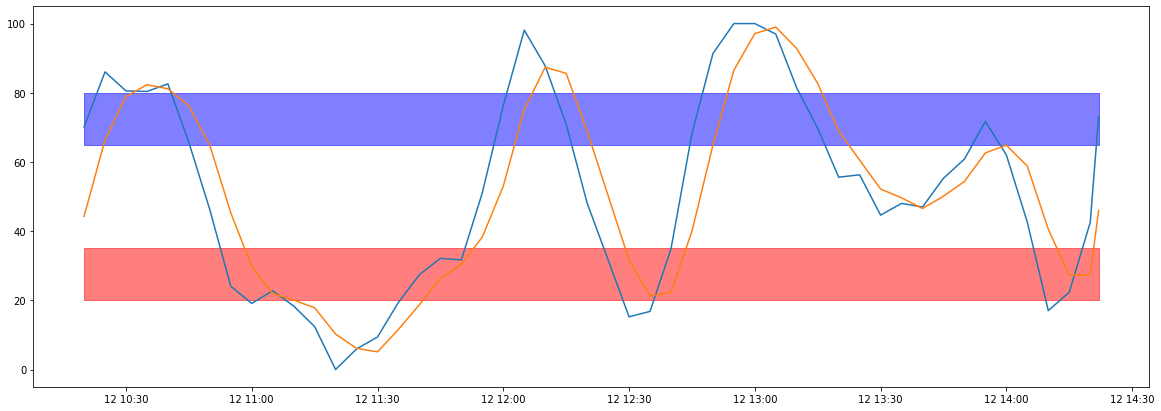

In [38]:
data = df[-50:]
plt.figure(figsize=[20,7])
plt.fill_between(data.index, 65,80 , color="blue" , alpha = 0.5)
plt.fill_between(data.index, 20,35 , color="red" , alpha = 0.5)
plt.plot(data.index , data.stochrsi_k)
plt.plot(data.index , data.stochrsi_d)
plt.show()

In [39]:
# Buy Signal
df["BuySignal"] = None
df[["PrevRsStoch_k" , "PrevRsStoch_d"]] = df[["stochrsi_k" , "stochrsi_d"]].shift()
df.loc[(df.EMA200 < df.Close) & (df.ST1_sig+df.ST1_sig + df.ST1_sig >= 1) & (df.PrevRsStoch_k > df.PrevRsStoch_d)& (df.stochrsi_k < df.stochrsi_d) , "BuySignal"] = 1
# df.loc[]

In [40]:
df["SellSignal"] = None
df.loc[(df.EMA200 > df.Close) & (df.ST1_sig+df.ST1_sig + df.ST1_sig <= -1) & (df.PrevRsStoch_k < df.PrevRsStoch_d)& (df.stochrsi_k > df.stochrsi_d) , "SellSignal"] = -1

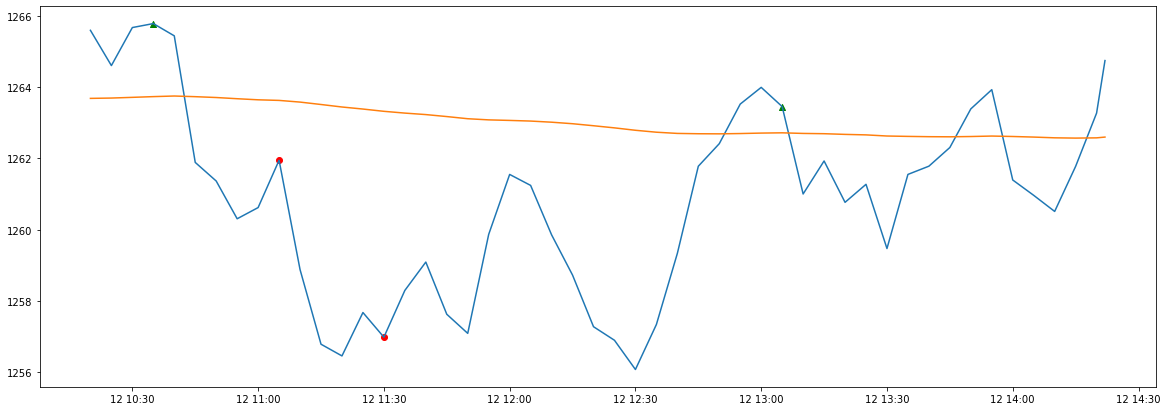

In [41]:
data = df[-50:]
plt.figure(figsize=[20,7])
plt.plot(data.index , data.Close)
plt.plot(data.index , data.EMA200)
plt.scatter(data.loc[data.BuySignal == 1].index , data.loc[data.BuySignal == 1,"Close"] , color="green" ,marker="^")
plt.scatter(data.loc[data.SellSignal == -1].index , data.loc[data.SellSignal == -1,"Close"] , color="red" ,marker="o")
plt.show()

In [42]:
data.to_json("price.json")